<a href="https://colab.research.google.com/github/Fercaspe/Data-UY/blob/main/FC_Ejercicio_basico_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Leer el archivo de datos desde GitHub
url = "https://raw.githubusercontent.com/gustavovazquez/datasets/main/SaratogaHouses.csv"
df = pd.read_csv(url)

df


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


In [ ]:
df.shape


(1728, 16)

In [ ]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [ ]:
df.columns


Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')

## OJO ##
La normalización no debe hacerse acá, se debe hacer después de hacer la separación de datos para entrenamiento y para test

In [ ]:
# Normalizando variables numéricas

scaler = StandardScaler()
numeric_vars = ["price", "lotSize", "age", "landValue", "livingArea", "pctCollege", "bedrooms", "fireplaces", "bathrooms", "rooms"]

df[numeric_vars] = scaler.fit_transform(df[numeric_vars])


# Aplicar One-Hot Encoding a las variables categóricas

encoder = OneHotEncoder(drop="first", sparse_output=False)
categorical_vars = ['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']
categorical_encoded = encoder.fit_transform(df[categorical_vars])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']))

# Concatenar el dataset con las variables codificadas

df = pd.concat([df.drop(columns=['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir']), categorical_df], axis=1)

In [ ]:
df.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating_hot air',
       'heating_hot water/steam', 'fuel_gas', 'fuel_oil',
       'sewer_public/commercial', 'sewer_septic', 'waterfront_Yes',
       'newConstruction_Yes', 'centralAir_Yes'],
      dtype='object')

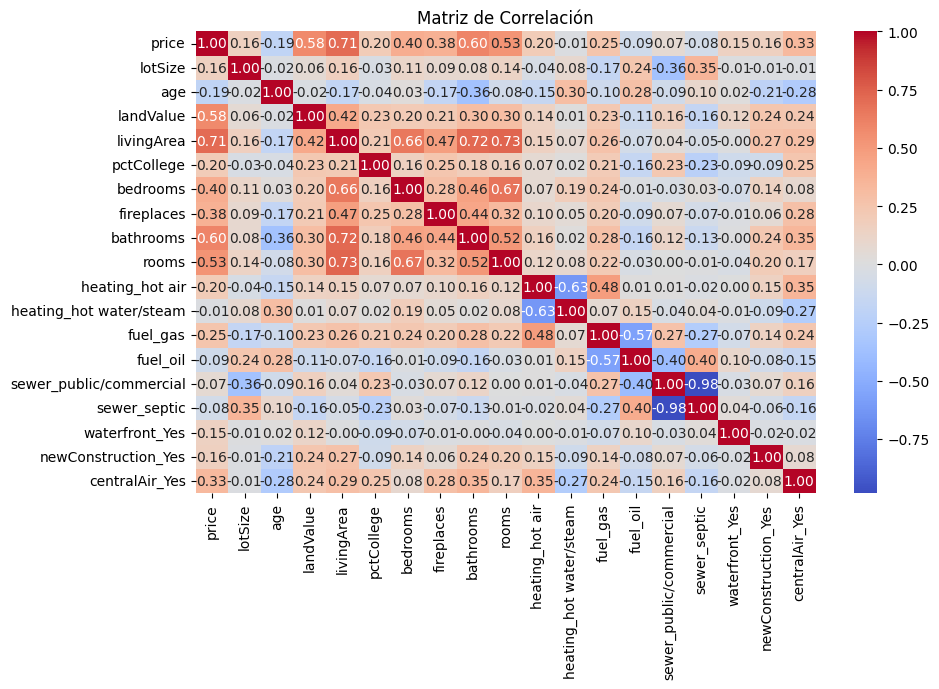

In [ ]:
# 2. Tabla de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

## OJO ##

Probablemente esta matriz de correlación haya que hacerla antes de hacer el One-Hot Encoding (ver....)
